In [26]:
from autots import AutoTS
import pandas as pd
import matplotlib.pyplot as plt

long=False
df = pd.read_csv("BASEo.csv", index_col=0, parse_dates=True, dayfirst=True)
df = df.iloc[:,:4]
df['Año'] = pd. DatetimeIndex(df.index).year
df['Mes'] = pd. DatetimeIndex(df.index).month
df.tail()

,Hora,Tipo Dia,Energia BSAS,Clima BSAS,Año,Mes
Fecha,,,,,,
2021-07-31 19:00:00,19,7,1993.628,11.6,2021,7
2021-07-31 20:00:00,20,7,2179.763,9.9,2021,7
2021-07-31 21:00:00,21,7,2185.000,9.0,2021,7
2021-07-31 22:00:00,22,7,2128.403,8.3,2021,7
2021-07-31 23:00:00,23,7,2061.354,7.9,2021,7


In [27]:
train = df.loc[(df['Tipo Dia'] == 7)]
train = train[:-24]
test = df.iloc[-24:]
train = train.iloc[:,:4]
train.head()

,Hora,Tipo Dia,Energia BSAS,Clima BSAS
Fecha,,,,
2018-01-06 00:00:00,0,7,1833.564,18.1
2018-01-06 01:00:00,1,7,1719.290,17.4
2018-01-06 02:00:00,2,7,1625.634,18.0
2018-01-06 03:00:00,3,7,1572.046,17.5
2018-01-06 04:00:00,4,7,1544.420,17.1


In [28]:
model = AutoTS(model_list= "superfast", forecast_length=24, verbose=1, frequency="H",
    ensemble= "simple",
    transformer_list="all",
    drop_most_recent=1,
    max_generations=2,
    num_validations=2,
    validation_method="backwards")
model.fit(train)

Model Number: 1 with model AverageValueNaive in generation 0 of 2
Model Number: 2 with model AverageValueNaive in generation 0 of 2
Model Number: 3 with model AverageValueNaive in generation 0 of 2
Model Number: 4 with model GLS in generation 0 of 2
Model Number: 5 with model GLS in generation 0 of 2
Model Number: 6 with model LastValueNaive in generation 0 of 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model Number: 7 with model LastValueNaive in generation 0 of 2
Model Number: 8 with model LastValueNaive in generation 0 of 2
Model Number: 9 with model LastValueNaive in generation 0 of 2
Model Number: 10 with model SeasonalNaive in generation 0 of 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model Number: 11 with model SeasonalNaive in generation 0 of 2
Model Number: 12 with model SeasonalNaive in generation 0 of 2
Model Number: 13 with model SeasonalNaive in generation 0 of 2
Model Number: 14 with model ZeroesNaive in generation 0 of 2
Model Number: 15 with model ZeroesNaive in generation 0 of 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model Number: 16 with model LastValueNaive in generation 0 of 2
Model Number: 17 with model AverageValueNaive in generation 0 of 2
Model Number: 18 with model GLS in generation 0 of 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model Number: 19 with model SeasonalNaive in generation 0 of 2
Model Number: 20 with model AverageValueNaive in generation 0 of 2
Model Number: 21 with model LastValueNaive in generation 0 of 2
Model Number: 22 with model AverageValueNaive in generation 0 of 2
Model Number: 23 with model SeasonalNaive in generation 0 of 2
Model Number: 24 with model LastValueNaive in generation 0 of 2
Model Number: 25 with model ZeroesNaive in generation 0 of 2
Model Number: 26 with model LastValueNaive in generation 0 of 2
Model Number: 27 with model ZeroesNaive in generation 0 of 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model Number: 28 with model SeasonalNaive in generation 0 of 2
Model Number: 29 with model SeasonalNaive in generation 0 of 2
Model Number: 30 with model LastValueNaive in generation 0 of 2
Model Number: 31 with model ZeroesNaive in generation 0 of 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\program

Model Number: 32 with model GLS in generation 0 of 2
Template Eval Error: ValueError('array must not contain infs or NaNs') in model 32: GLS
Model Number: 33 with model ZeroesNaive in generation 0 of 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\program

Model Number: 34 with model LastValueNaive in generation 0 of 2
New Generation: 1 of 2
Model Number: 35 with model AverageValueNaive in generation 1 of 2
Model Number: 36 with model AverageValueNaive in generation 1 of 2
Model Number: 37 with model AverageValueNaive in generation 1 of 2
Model Number: 38 with model ZeroesNaive in generation 1 of 2
Model Number: 39 with model ZeroesNaive in generation 1 of 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model Number: 40 with model ZeroesNaive in generation 1 of 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model Number: 41 with model LastValueNaive in generation 1 of 2
Model Number: 42 with model LastValueNaive in generation 1 of 2
Model Number: 43 with model LastValueNaive in generation 1 of 2
Model Number: 44 with model SeasonalNaive in generation 1 of 2
Model Number: 45 with model SeasonalNaive in generation 1 of 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\_loss\glm_distribution.py:315: RuntimeWarning:

invalid value encountered in add

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\users\ilici\

Model Number: 46 with model SeasonalNaive in generation 1 of 2
Model Number: 47 with model SeasonalNaive in generation 1 of 2
Model Number: 48 with model GLS in generation 1 of 2
Model Number: 49 with model GLS in generation 1 of 2
Model Number: 50 with model GLS in generation 1 of 2
New Generation: 2 of 2
Model Number: 51 with model AverageValueNaive in generation 2 of 2
Model Number: 52 with model AverageValueNaive in generation 2 of 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model Number: 53 with model AverageValueNaive in generation 2 of 2
SinTrend failed with RuntimeError('Optimal parameters not found: Number of calls to function has reached maxfev = 10000.') for Tipo Dia with 0
Model Number: 54 with model LastValueNaive in generation 2 of 2
Model Number: 55 with model LastValueNaive in generation 2 of 2
Model Number: 56 with model ZeroesNaive in generation 2 of 2
Model Number: 57 with model ZeroesNaive in generation 2 of 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model Number: 58 with model SeasonalNaive in generation 2 of 2
Model Number: 59 with model SeasonalNaive in generation 2 of 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model Number: 60 with model SeasonalNaive in generation 2 of 2
Model Number: 61 with model SeasonalNaive in generation 2 of 2
Model Number: 62 with model GLS in generation 2 of 2
Model Number: 63 with model GLS in generation 2 of 2
Model Number: 64 with model GLS in generation 2 of 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning:

overflow encountered in multiply

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning:

overflow encountered in reduce

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model Number: 65 with model Ensemble in generation 3 of 0


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning:

overflow encountered in multiply

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning:

overflow encountered in reduce

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning:

overflow encountered in multiply

c:\users\ilici\appdata\local\programs\python

Model Number: 66 with model Ensemble in generation 3 of 0


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning:

overflow encountered in multiply

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning:

overflow encountered in reduce



Model Number: 67 with model Ensemble in generation 3 of 0


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Validation Round: 1
One or more series is 90% or more NaN in this test split
Model Number: 1 of 11 with model Ensemble for Validation 1


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning:

overflow encountered in multiply

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning:

overflow encountered in reduce

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning:

overflow encountered in multiply

c:\users\ilici\appdata\local\programs\python

Model 1 of model Ensemble with avg smape nan: 
Model Number: 2 of 11 with model GLS for Validation 1


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model 2 of model GLS with avg smape nan: 
Model Number: 3 of 11 with model Ensemble for Validation 1


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning:

overflow encountered in multiply

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning:

overflow encountered in reduce

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning:

overflow encountered in multiply

c:\users\ilici\appdata\local\programs\python

Model 3 of model Ensemble with avg smape nan: 
Model Number: 4 of 11 with model Ensemble for Validation 1


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model 4 of model Ensemble with avg smape nan: 
Model Number: 5 of 11 with model AverageValueNaive for Validation 1


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model 5 of model AverageValueNaive with avg smape nan: 
Model Number: 6 of 11 with model AverageValueNaive for Validation 1
Model 6 of model AverageValueNaive with avg smape nan: 
Model Number: 7 of 11 with model AverageValueNaive for Validation 1
Model 7 of model AverageValueNaive with avg smape nan: 
Model Number: 8 of 11 with model LastValueNaive for Validation 1
Model 8 of model LastValueNaive with avg smape nan: 
Model Number: 9 of 11 with model LastValueNaive for Validation 1
Model 9 of model LastValueNaive with avg smape nan: 
Model Number: 10 of 11 with model AverageValueNaive for Validation 1
SinTrend failed with RuntimeError('Optimal parameters not found: Number of calls to function has reached maxfev = 10000.') for Tipo Dia with 0
Model 10 of model AverageValueNaive with avg smape nan: 
Model Number: 11 of 11 with model ZeroesNaive for Validation 1
Model 11 of model ZeroesNaive with avg smape nan: 
Validation Round: 2
One or more series is 90% or more NaN in this test split


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model Number: 1 of 11 with model Ensemble for Validation 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning:

overflow encountered in multiply

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning:

overflow encountered in reduce

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning:

overflow encountered in multiply

c:\users\ilici\appdata\local\programs\python

Model 1 of model Ensemble with avg smape nan: 
Model Number: 2 of 11 with model GLS for Validation 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model 2 of model GLS with avg smape nan: 
Model Number: 3 of 11 with model Ensemble for Validation 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning:

overflow encountered in multiply

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning:

overflow encountered in reduce

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning:

overflow encountered in multiply

c:\users\ilici\appdata\local\programs\python

Model 3 of model Ensemble with avg smape nan: 
Model Number: 4 of 11 with model Ensemble for Validation 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model 4 of model Ensemble with avg smape nan: 
Model Number: 5 of 11 with model AverageValueNaive for Validation 2
Model 5 of model AverageValueNaive with avg smape nan: 
Model Number: 6 of 11 with model AverageValueNaive for Validation 2


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Model 6 of model AverageValueNaive with avg smape nan: 
Model Number: 7 of 11 with model AverageValueNaive for Validation 2
Model 7 of model AverageValueNaive with avg smape nan: 
Model Number: 8 of 11 with model LastValueNaive for Validation 2
Model 8 of model LastValueNaive with avg smape nan: 
Model Number: 9 of 11 with model LastValueNaive for Validation 2
Model 9 of model LastValueNaive with avg smape nan: 
Model Number: 10 of 11 with model AverageValueNaive for Validation 2
SinTrend failed with RuntimeError('Optimal parameters not found: Number of calls to function has reached maxfev = 10000.') for Tipo Dia with 0
Model 10 of model AverageValueNaive with avg smape nan: 
Model Number: 11 of 11 with model ZeroesNaive for Validation 2
Model 11 of model ZeroesNaive with avg smape nan: 


c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



Initiated AutoTS object with best model: 
Ensemble
{}
{'model_name': 'BestN', 'model_count': 3, 'model_metric': 'best_score', 'models': {'add2ee3154f0d67fabdf65da2c2829b6': {'Model': 'GLS', 'ModelParameters': '{}', 'TransformationParameters': '{"fillna": "barycentric", "transformations": {"0": "DatepartRegression", "1": "PowerTransformer"}, "transformation_params": {"0": {"regression_model": {"model": "RandomForest", "model_params": {}}, "datepart_method": "recurring"}, "1": {}}}'}, 'dd107a62cb142002de84c814d077c403': {'Model': 'AverageValueNaive', 'ModelParameters': '{"method": "Weighted_Mean"}', 'TransformationParameters': '{"fillna": "fake_date", "transformations": {"0": "StandardScaler", "1": "PowerTransformer", "2": "SinTrend", "3": "Slice", "4": "Slice"}, "transformation_params": {"0": {}, "1": {}, "2": {}, "3": {"method": 0.8}, "4": {"method": 0.5}}}'}, '5725f3e3e279310004c27942b638a7b0': {'Model': 'AverageValueNaive', 'ModelParameters': '{"method": "Weighted_Mean"}', 'Transform

In [32]:
prediction = model.predict()
forecasts_df = prediction.forecast

# accuracy of all tried model results
model_results = model.results()
# and aggregated from cross validation
validation_results = model.results("Validation")
forecasts_df.head(24)

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:545: RuntimeWarning:

overflow encountered in multiply

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:546: RuntimeWarning:

overflow encountered in reduce

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\scipy\interpolate\polyint.py:643: RuntimeWarning:

invalid value encountered in true_divide

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log

c:\users\ilici\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning:

divide by zero encountered in log



,Hora,Tipo Dia,Energia BSAS,Clima BSAS
2021-07-24 23:00:00,15.644419,7.0,1878.277829,12.545430
2021-07-25 00:00:00,7.339153,7.0,1834.142691,12.643960
2021-07-25 01:00:00,6.694399,7.0,1823.108240,12.644315
2021-07-25 02:00:00,6.115424,7.0,1811.717974,12.644726
2021-07-25 03:00:00,5.641679,7.0,1800.782205,12.645196
2021-07-25 04:00:00,5.305445,7.0,1791.028531,12.645722
2021-07-25 05:00:00,5.129632,7.0,1783.034189,12.646306
2021-07-25 06:00:00,5.126220,7.0,1777.216488,12.646948
2021-07-25 07:00:00,5.295442,7.0,1773.874594,12.647647
2021-07-25 08:00:00,5.625767,7.0,1773.180192,12.648403


In [98]:
forecasts_df.to_excel("forecast.xlsx")

In [33]:
validation_results.sort_values("Score")

,ID,Model,ModelParameters,TransformationParameters,TransformationRuntime,FitRuntime,PredictRuntime,TotalRuntime,Ensemble,Exceptions,...,spl,contour,smape_weighted,mae_weighted,rmse_weighted,containment_weighted,spl_weighted,contour_weighted,TotalRuntimeSeconds,Score
73,8d78fc1eee48308fc180e4c52ec9dae0,AverageValueNaive,"{""method"": ""Median""}","{""fillna"": ""linear"", ""transformations"": {""0"": ...",0 days 00:00:00.042940,0 days 00:00:00.001028,0 days 00:00:00.000997,0 days 00:00:00.050915,0,NaN,...,NaN,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000,1,1.854430e+00
76,7bd385ec0a1577366cc7fd738b6ea038,AverageValueNaive,"{""method"": ""Exp_Weighted_Mean""}","{""fillna"": ""linear"", ""transformations"": {""0"": ...",0 days 00:00:07.561651,0 days 00:00:00.004401,0 days 00:00:00.000998,0 days 00:00:07.573035,0,NaN,...,NaN,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000,8,1.854430e+00
84,8d78fc1eee48308fc180e4c52ec9dae0,AverageValueNaive,"{""method"": ""Median""}","{""fillna"": ""linear"", ""transformations"": {""0"": ...",0 days 00:00:00.038225,0 days 00:00:00,0 days 00:00:00.000997,0 days 00:00:00.046204,0,NaN,...,NaN,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000,1,1.854430e+00
87,7bd385ec0a1577366cc7fd738b6ea038,AverageValueNaive,"{""method"": ""Exp_Weighted_Mean""}","{""fillna"": ""linear"", ""transformations"": {""0"": ...",0 days 00:00:06.078080,0 days 00:00:00.002742,0 days 00:00:00.000996,0 days 00:00:06.087804,0,NaN,...,NaN,0.793478,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.793478,7,2.237410e+00
79,add2ee3154f0d67fabdf65da2c2829b6,GLS,{},"{""fillna"": ""barycentric"", ""transformations"": {...",0 days 00:00:47.736724,0 days 00:00:00.003052,0 days 00:00:00.104230,0 days 00:00:47.944294,0,NaN,...,NaN,0.500000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.500000,48,2.781644e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,a09fb9aface51a31fbbb11737736d754,LastValueNaive,{},"{""fillna"": ""zero"", ""transformations"": {""0"": ""Q...",0 days 00:00:00.015958,0 days 00:00:00.001995,0 days 00:00:00.000997,0 days 00:00:00.024869,0,NaN,...,1.512618e+01,0.195652,197.826087,4.777027e+02,4.793504e+02,0.010417,1.512618e+01,0.195652,1,2.805393e+02
23,558631de832dcf9f741f6bdfa3f9b6f9,LastValueNaive,{},"{""fillna"": ""spline"", ""transformations"": {""0"": ...",0 days 00:00:13.700468,0 days 00:00:00.000994,0 days 00:00:00.000966,0 days 00:00:13.710422,0,NaN,...,8.496051e+01,0.228261,149.107892,3.802871e+03,3.803481e+03,0.000000,8.496051e+01,0.228261,14,9.899308e+02
18,52309c117ba5cd6d329cd8b032f88f6e,SeasonalNaive,"{""method"": ""LastValue"", ""lag_1"": 2, ""lag_2"": 60}","{""fillna"": ""spline"", ""transformations"": {""0"": ...",0 days 00:00:02.302725,0 days 00:00:00,0 days 00:00:00.106105,0 days 00:00:02.414003,0,NaN,...,3.826965e+08,0.500000,148.940517,3.680932e+10,3.693055e+10,0.239583,3.826965e+08,0.500000,3,7.199422e+09
42,32606a56920f232ee1b88af2036ed715,LastValueNaive,{},"{""fillna"": ""cubic"", ""transformations"": {""0"": ""...",0 days 00:00:00.157194,0 days 00:00:00.004919,0 days 00:00:00.002457,0 days 00:00:00.172135,0,NaN,...,2.051024e+49,0.500000,66.826196,9.210172e+02,1.330000e+03,0.114583,2.051024e+49,0.500000,1,5.713523e+49


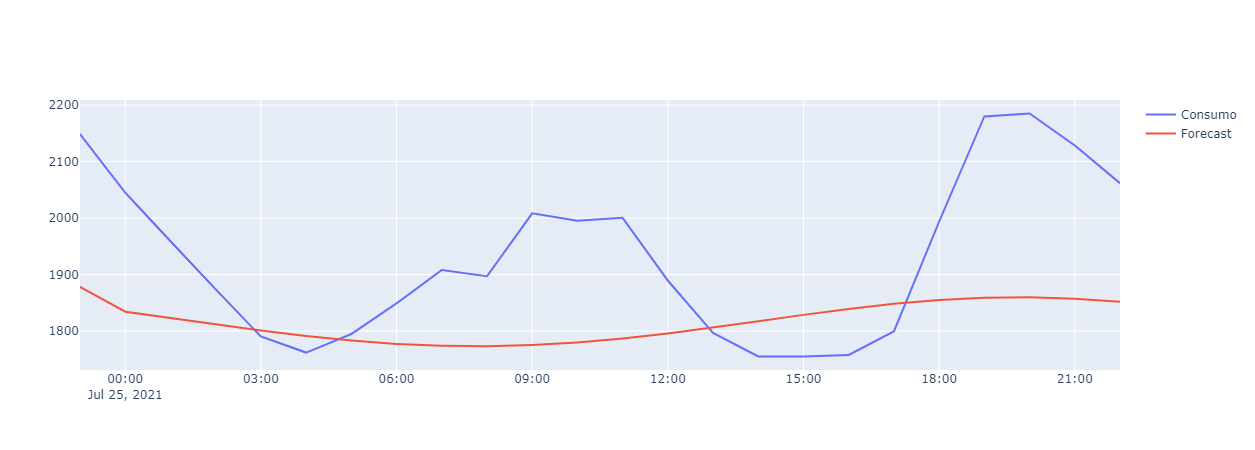

In [34]:
import plotly.graph_objects as go
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=forecasts_df.index, y=test["Energia BSAS"], name='Consumo'))
fig.add_trace(go.Scatter(x=forecasts_df.index, y=forecasts_df["Energia BSAS"], name = 'Forecast'))
fig.show()